In [1]:
import requests
from bs4 import BeautifulSoup
from PIL import Image
from IPython.display import display
import re
import os
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
os.mkdir('shoes')
os.mkdir('shoes/train')
os.mkdir('shoes/test')
items=['men-sneakers','mens-slippers','formal-shoes','men-slippers-sandals','mens-loafers-slip-ons','mens-boots']
for i in items:
  os.mkdir(f'shoes/train/{i}')
  os.mkdir(f'shoes/test/{i}')

## Scraping formal shoes from shoeplace.ng

In [3]:
def download_image(train_or_test,folder_name):
  all_url=[]
  res=requests.get(f'https://shoeplace.ng/10-formal-shoes').content
  be=BeautifulSoup(res,'lxml')
  for i in range(len(be.find_all('img'))):
    try:
      all_url.append(be.find_all('img')[i]['data-full-size-image-url'])
    except:
      pass


  for i in range(len(all_url)):
    r = requests.get(all_url[i])

    with open(f"shoes/{train_or_test}/{folder_name}/{i}.jpg",'wb') as f:

      f.write(r.content)
  return

In [4]:
download_image('train','formal-shoes')

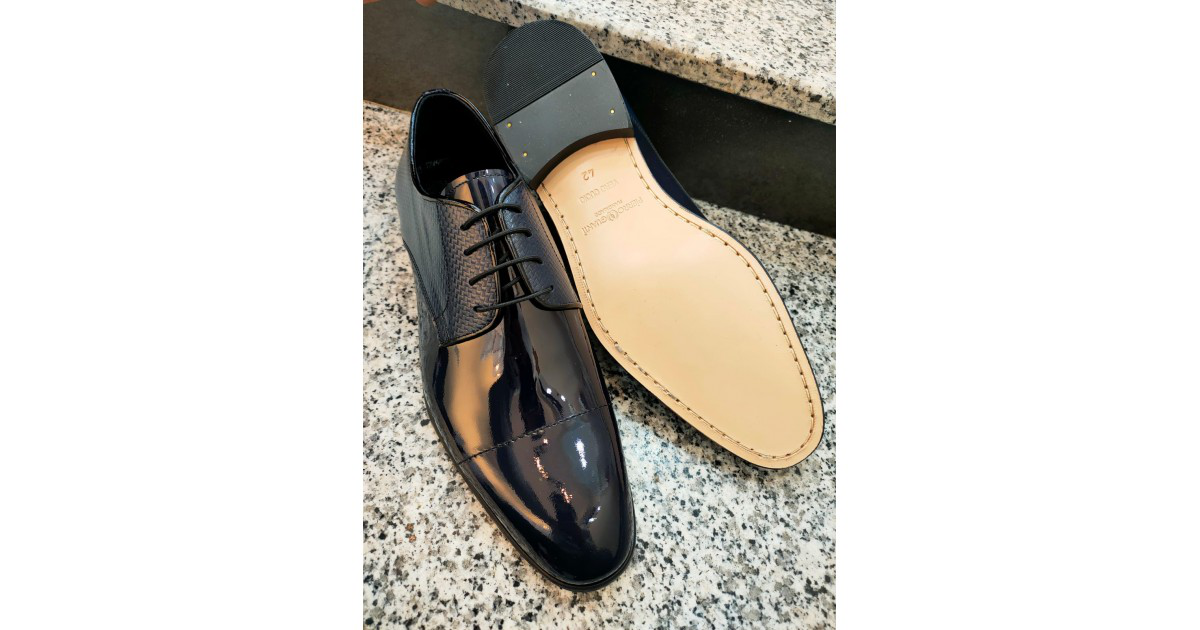

In [5]:
Image.open('/content/shoes/train/formal-shoes/40.jpg')

### Scrapping sneakers, sandals and boots from en.afew-store.com

In [6]:
# sneakers
# footwear-sandals-slides
# footwear-boots
def download_image(start_page,end_page,item_name,folder_name,train_or_test):
  all_url=[]
  for i in range(start_page,end_page):
    res=requests.get(f'https://en.afew-store.com/collections/{item_name}?offset={i}').content
    be=BeautifulSoup(res,'lxml')

    for i in range(len(be.find_all('img'))):
      try:
        all_url.append(be.find_all('img')[i]['data-src'])
      except:
        pass



  for i in range(len(all_url)):
    r = requests.get('https:'+all_url[i])

    with open(f"shoes/{train_or_test}/{folder_name}/{i}.jpg",'wb') as f:

      f.write(r.content)
  return

### downloading into training folder

In [7]:
download_image(0,3000,'sneakers','men-sneakers','train')
download_image(0,3000,'footwear-sandals-slides','men-slippers-sandals','train')
download_image(0,3000,'footwear-boots','mens-boots','train')

In [8]:
download_image(3000,5000,'sneakers','men-sneakers','test')
download_image(3000,5000,'footwear-sandals-slides','men-slippers-sandals','test')
download_image(3000,5000,'footwear-boots','mens-boots','test')

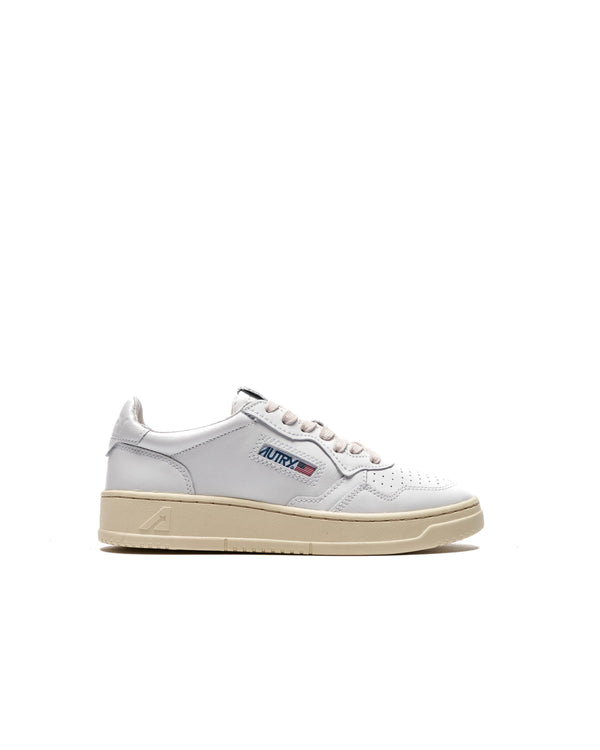

In [9]:
Image.open('/content/shoes/train/men-sneakers/144.jpg')

### Sneakers from unsplash

In [10]:
all_url=[]
res=requests.get('https://unsplash.com/s/photos/sneakers').content
be=BeautifulSoup(res,'lxml')

for i in range(len(be.find_all('img'))):
  if re.findall('faces',be.find_all('img')[i]['src'])!=['faces']:
    all_url.append(be.find_all('img')[i]['src'])
  else:
    pass

for i in range(len(all_url)):
  r = requests.get(all_url[i])

  with open(f"shoes/train/men-sneakers/{i}.jpg",'wb') as f:

    f.write(r.content)  

### sneakers from billionaire.com

In [11]:
all_url=[]
fit_url=[]
for c in range(7):
  res=requests.get(f'https://www.billionaire.com/al/shoes/sneakers/?page={c}').content
  be=BeautifulSoup(res,'lxml')

  for i in range(len(be.find_all('img'))):
      try:
        all_url.append(be.find_all('img')[i]['src'])
      except:
        pass      

for b in all_url:
  if re.findall('main',b)==['main']:
    fit_url.append(b)

for i in range(len(fit_url)):
  r = requests.get(fit_url[i])

  with open(f"shoes/train/men-sneakers/{i}.jpg",'wb') as f:

    f.write(r.content)

### Sneakers, slippers, formal-shoes, sandals, loafers-slip-ons and boots from jumia

In [12]:
# list of item to scrape
# men-sneakers
# mens-slippers
# formal-shoes
# men-slippers-sandals
# mens-loafers-slip-ons
# mens-boots
def download_image(folder_name,start_page,end_page,train_or_test,item_to_scrape):
  fit_url=[]
  all_url=[]
  #total_pages=page_numbers*train_test_percentage
  for i in range(start_page,end_page):
    url=f'https://www.jumia.com.ng/{item_to_scrape}/?page={i}#catalog-listing'
    result=requests.get(url).content
    bs=BeautifulSoup(result,'lxml')

    for c in range(len(bs.find_all('img'))):
      all_url.append(bs.find_all('img')[c]['data-src'])
      if re.findall('product',all_url[c])==['product']:
        fit_url.append(all_url[c])
      else:
        pass


  for i in range(len(fit_url)):
    r = requests.get(fit_url[i]) # create HTTP response object
  
    with open(f"shoes/{train_or_test}/{folder_name}/{i}.jpg",'wb') as f:
  
      f.write(r.content)
  return

## Downloading into training folder

In [ ]:
download_image('men-sneakers',0,36,'train','men-sneakers')
download_image('men-sneakers',0,36,'train','men-sneakers')
download_image('mens-slippers',0,36,'train','mens-slippers')
download_image('formal-shoes',0,36,'train','formal-shoes')
download_image('men-slippers-sandals',0,36,'train','men-slippers-sandals')
download_image('mens-loafers-slip-ons',0,36,'train','mens-loafers-slip-ons')
download_image('mens-boots',0,36,'train','mens-boots')

## Downloading into test folder

In [ ]:
download_image('men-sneakers',36,51,'test','men-sneakers')
download_image('men-sneakers',36,51,'test','men-sneakers')
download_image('mens-slippers',36,51,'test','mens-slippers')
download_image('formal-shoes',36,51,'test','formal-shoes')
download_image('men-slippers-sandals',36,51,'test','men-slippers-sandals')
download_image('mens-loafers-slip-ons',36,51,'test','mens-loafers-slip-ons')
download_image('mens-boots',36,51,'test','mens-boots')

In [ ]:
seed=32
train=keras.utils.image_dataset_from_directory('/content/shoes/train',seed=seed,image_size=(180,180),validation_split=0.2,subset='training')
val=keras.utils.image_dataset_from_directory('/content/shoes/train',seed=seed,image_size=(180,180),validation_split=0.2,subset='validation')

In [ ]:
test=keras.utils.image_dataset_from_directory('/content/shoes/test',seed=seed,image_size=(180,180))

In [ ]:
train.class_names

In [ ]:
image,label=next(iter(train))

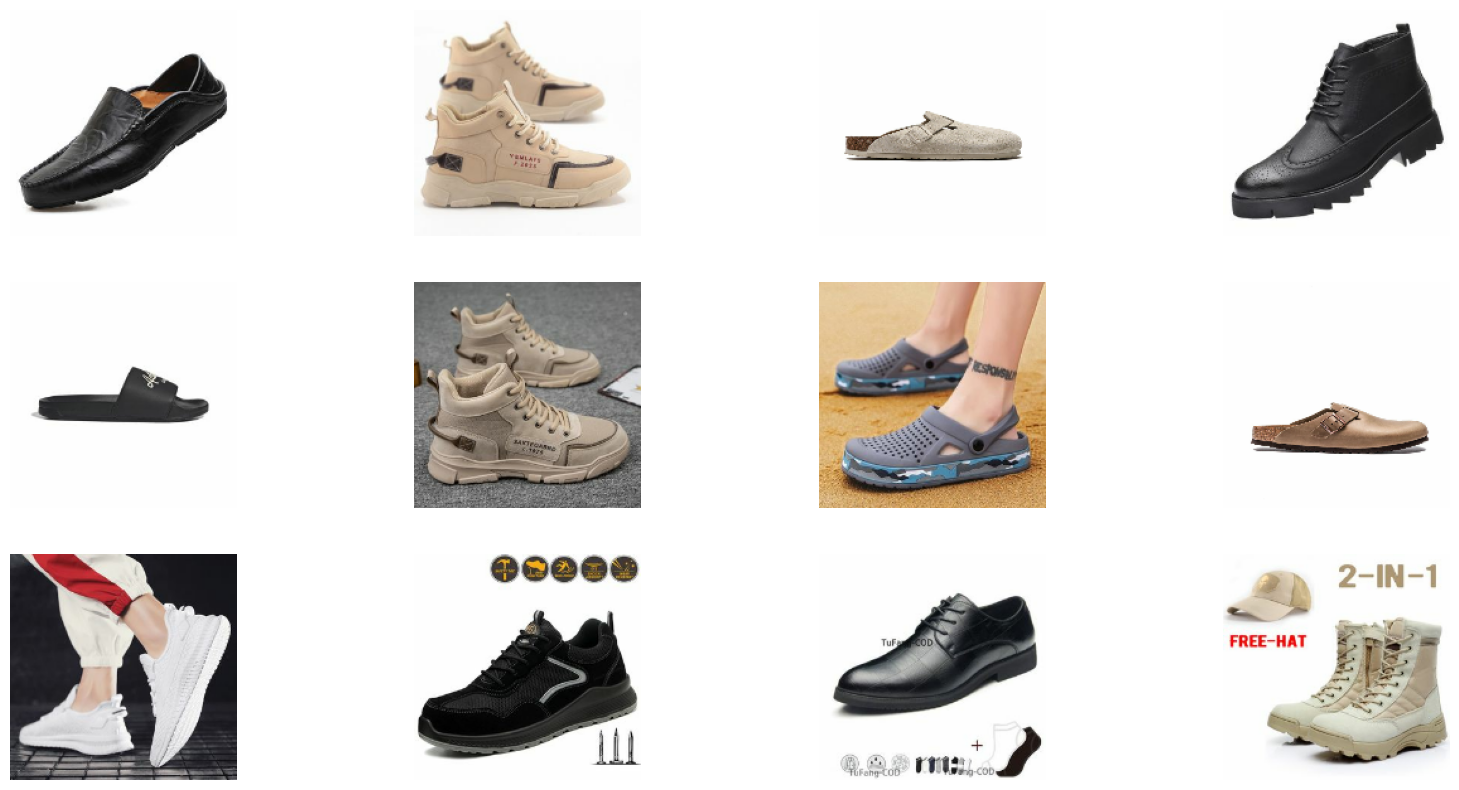

In [ ]:
plt.figure(figsize=(20,10))
for i in range(12):
  plt.subplot(3,4,1+i)
  plt.imshow(image[i].numpy().astype('uint8'))
  plt.axis('off')

In [ ]:
autotune=tf.data.AUTOTUNE
train_ds=train.cache().prefetch(buffer_size=autotune)
val_ds=val.cache().prefetch(buffer_size=autotune)
test_ds=test.cache().prefetch(buffer_size=autotune)

In [ ]:
model=keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(60,5,activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(80,6,activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(100,8,activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(6)
])


In [ ]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])

In [23]:
es=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

In [ ]:
history=model.fit(train_ds,validation_data=val_ds,epochs=5,callbacks=[es])

Epoch 1/5
225/225 [==============================] - 2688s 12s/step - loss: 0.6452 - accuracy: 0.7795 - val_loss: 0.1195 - val_accuracy: 0.9587
Epoch 2/5
225/225 [==============================] - 2631s 12s/step - loss: 0.0652 - accuracy: 0.9831 - val_loss: 0.0343 - val_accuracy: 0.9866
Epoch 3/5
225/225 [==============================] - 2627s 12s/step - loss: 0.0270 - accuracy: 0.9918 - val_loss: 0.0195 - val_accuracy: 0.9955
Epoch 4/5
225/225 [==============================] - 2602s 12s/step - loss: 0.0251 - accuracy: 0.9918 - val_loss: 0.0219 - val_accuracy: 0.9961
Epoch 5/5
205/225 [==========================>...] - ETA: 3:37 - loss: 0.0313 - accuracy: 0.9921

In [31]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [44]:
model.evaluate(test_ds)

116/116 [==============================] - 331s 3s/step - loss: 6.9321 - accuracy: 0.2986


[6.932116985321045, 0.298564076423645]

In [33]:
loss=history.history['loss']
accuracy=history.history['accuracy']
val_loss=history.history['val_loss']
val_accuracy=history.history['val_accuracy']

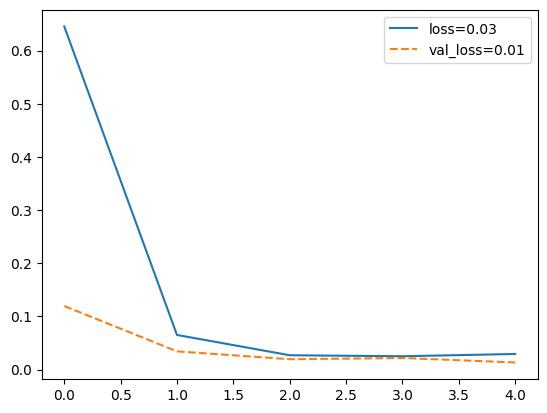

In [43]:
plt.plot(range(len(loss)),loss,label=f'loss={round(loss[-1],2)}')
plt.plot(range(len(loss)),val_loss,'--',label=f'val_loss={round(val_loss[-1],2)}')
plt.legend()

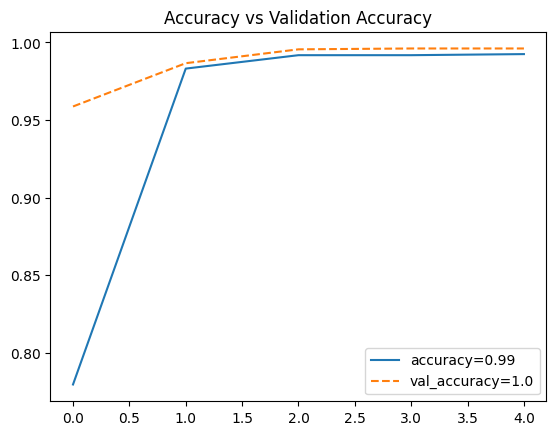

In [42]:
plt.plot(range(len(loss)),accuracy,label=f'accuracy={round(accuracy[-1],2)}')
plt.plot(range(len(loss)),val_accuracy,'--',label=f'val_accuracy={round(val_accuracy[-1],2)}')
plt.title('Accuracy vs Validation Accuracy')
plt.legend()

In [45]:
prob_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [1]:
predictions=prob_model.predict(test_ds)

NameError: ignored

In [ ]:
7